## Name: Kandarp Chaudhary
## Roll No.: D21016

In [1]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg

In [3]:
#creating pandas data frame for data set 
cars = pd.read_csv("cars.csv") #Please make sure that file "cars.csv" is in same folder as this jupyter notebook
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [4]:
X = cars[['Cylinders','Weight','Horsepower']] #Defining 'Cylinders','Weight' and 'Horsepower' as the predictors
y = cars['MPG']                               #Defining MPG as target variable

After selecting the predictors, now we will split the data into train and test datasets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) #Splitting data into train and test datasets

* To select the best Machine learning model, we will use k-fold cross validation for each ML algorithm. For this cross validation, we will use average RMSE as CV Score. The purpose of choosing RMSE is to penalize the model more for predicting target values which are further away from actual target value. This happens because the errors are squared before they are averaged, hence the RMSE gives a relatively high weight to large errors.
* After finding the optimum model for a given algorithm, we will test all the algorithms on a test set and calculate both the RMSE and MAE metric, and declare the model having least values of RMSE and MAE as the best Machine Learning Model among all candidates for this dataset.

# 1) KNN Regression Model:

Let's find out optimum value of k in the KNN model for X_train predictors using cross validation with RMSE as the error metric.

(46, 5.281176339675214)


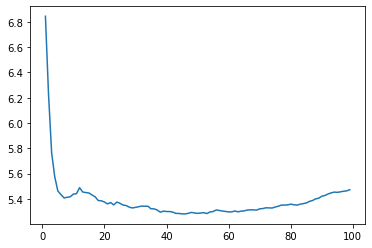

In [6]:
cv = []                              #defining list which will contain cv score for each KNN model
m = 999999999                        #variable to contain the minimum cv score 
k = list(range(1,100))               #list of 1 to 100 neighbors
for i in k:                          #iterating through values of k to find optimum number of neighbours for KNN Regression model
    kNN = KNeighborsRegressor(n_neighbors=i) #Defining KNN Regressor Model for i neighbours
    scores = cross_val_score(kNN, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
    a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
    cv.append(a)                     #appending cv score to the list
    if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
        m = np.abs(np.mean(scores))  #update value of minimum cv score
        p = (i, m)                   #creating tuple of minimun cv score and corresponding value of k
plt.plot(k,cv)                       #plotting graph of k against cv
print(p)
cv1 = p[1]

In [7]:
KNN = KNeighborsRegressor(n_neighbors=46)       #Defining KNN Regression Model
KNN.fit(X_train, y_train)                       #training the '37'NN model using both training and validation set
y_pred1 = KNN.predict(X_test)                   #predicting y for predictors of X_test
RMSE1 = np.sqrt(np.mean((y_pred1-y_test)**2))   #finding RMSE for test data
MAE1 = np.mean(np.abs(y_pred1-y_test))          #finding MAE for test data
RMSE1, MAE1

(3.980339526431032, 2.9164647184604426)

* In the above KNN model has MAE of 2.91 which suggests that the predicted value of MPG for this model is within ±2.91 MPG of actual value of the MPG for the predictors.
* In the above case we did not standardize the predictors. But for a distance based algorithm like KNN it is always important that you standardize the data before trainig the model.
* In this case the Predictors Weight has values in 1000s of pounds, Horsepower is in 100s and the cylinders has single digit value. So if we do not normalize the data before training the model then the Weight and Horsepower will have greater impact on the trained model as the value of distance between points will affected more  by them comparitively. Hence we will find the KNN parameters once again but this time we will use standardized X_train predictors to remove the above mentioned bias from the KNN model.

In [8]:
X_train_stand = (X_train - X_train.mean())/X_train.std()     #standardising the training data
X_test_stand = (X_test - X_train.mean())/X_train.std()       #standardising the test data

(12, 5.042874338093063)


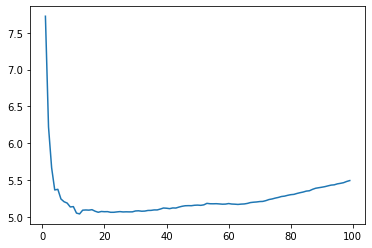

In [9]:
cv = []                              #defining list which will contain cv score for each KNN model
m = 999999999                        #variable to contain the minimum cv score 
k = list(range(1,100))               #list of 1 to 100 neighbors
for i in k:                          #iterating through values of k to find optimum number of neighbours for KNN Regression model
    kNN = KNeighborsRegressor(n_neighbors=i) #Defining KNN Regressor Model for i neighbours
    scores = cross_val_score(kNN, X_train_stand, y_train, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
    a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
    cv.append(a)                     #appending cv score to the list
    if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
        m = np.abs(np.mean(scores))  #update value of minimum cv score
        p = (i, m)                   #creating tuple of minimun cv score and corresponding value of k
plt.plot(k,cv)                       #plotting graph of k against cv
print(p)
cv11 = p[1]

In [10]:
KNN = KNeighborsRegressor(n_neighbors=12)       #Defining KNN Regression Model
KNN.fit(X_train_stand, y_train)                 #training the '12'NN model using both training and validation set
y_pred1 = KNN.predict(X_test_stand)             #predicting y for predictors of X_test
RMSE11 = np.sqrt(np.mean((y_pred1-y_test)**2))  #finding RMSE for test data
MAE11 = np.mean(np.abs(y_pred1-y_test))         #finding MAE for test data
RMSE11, MAE11

(3.696452309537468, 2.6952868852459)

* The Standardized KNN model has MAE of 2.69 which suggests that the predicted value of MPG for this model is within ±2.69 MPG of actual value of the MPG for the predictors.
* So as we can see from the test data set results, the standardized model gives us less error compared to the non-standardized model. Also the value of k(neighbors) is also diffrent for the standardized and non-standardized KNN model.

# 2) Multiple Linear Regression Model:

Let's Find the multiple linear regression model for X_train predictors using cross validation with RMSE as the error metric.

In [11]:
Regression = linear_model.LinearRegression()    #Defining Multiple Lineaar Regression Model
scores2 = cross_val_score(Regression, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
cv2 = np.abs(np.mean(scores2))                  #finding absolute mean of negative RMSE for each fold of cross validation
cv2

5.376453273496942

Obtaining RMSE and MAE for the X_test dataset using the multiple linear regression model.

In [12]:
Regression.fit(X_train, y_train)                #Fitting Multiple Lineaar Regression Model
y_pred2 = Regression.predict(X_test)            #predicting y for predictors of X_test
RMSE2 = np.sqrt(np.mean((y_pred2-y_test)**2))   #finding RMSE for test data
MAE2 = np.mean(np.abs(y_pred2-y_test))          #finding MAE for test data
RMSE2, MAE2

(4.137032451968017, 3.181001134967238)

In [23]:
Regression.intercept_, Regression.coef_

(45.960339534521495, array([-0.27710431, -0.00536833, -0.05272208]))

In [24]:
X_train.head()

,Cylinders,Weight,Horsepower
216,4,3270,88
31,8,4615,215
333,4,2335,48
255,4,1800,60
45,8,4209,165


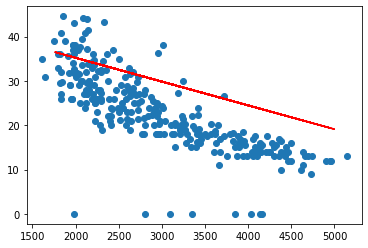

In [26]:
plt.scatter(X_train['Weight'],y_train)
plt.plot(X_test['Weight'],45.960339534521495+(-0.00536833)*X_test['Weight'], color='red')

* In the above Multiple Lineaar Regression Model has MAE of 3.18 which suggests that the predicted value of MPG for this model is within ±3.18 MPG of actual value of the MPG for the predictors.

# 3) Decision Tree Regression Model:

Optimizing decision tree for only maximum tree depth using cross validation

(3, 5.700329089240617)


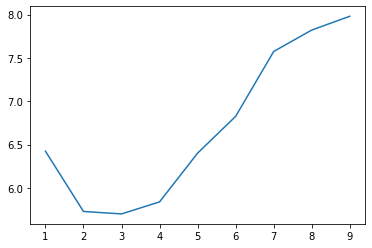

In [14]:
cv = []                              #defining list which will contain cv score for each KNN model
m = 999999999                        #variable to contain the minimum cv score 
k = list(range(1,10))                #list of 1 to 10 maximum tree depth
for i in k:                          #iterating through values of n to find optimum number of maximum tree depth
    Decision_tree = DecisionTreeRegressor(max_depth=i) #Defining Decidion tree regressor model
    scores = cross_val_score(Decision_tree, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
    a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
    cv.append(a)                     #appending cv score to the list
    if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
        m = np.abs(np.mean(scores))  #update value of minimum cv score
        p = (i, m)                   #creating tuple for minimum cv score & corresponding maximum tree depth
plt.plot(k,cv)                       
print(p)

* Optimizing decision tree for only minimum sample leaf using cross validation

(27, 5.330814169881366)


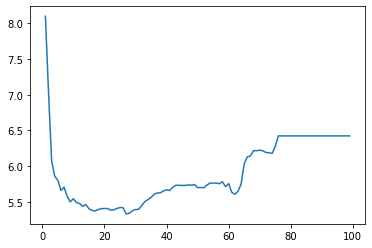

In [15]:
cv = []                              #defining list which will contain cv score for each KNN model
m = 999999999                        #variable to contain the minimum cv score 
k = list(range(1,100))               #list of 1 to 100 minimum sample leaf
for i in k:                          #iterating through values of k to find optimum number of minimum sample leaf
    Decision_tree = DecisionTreeRegressor(min_samples_leaf=i) #Defining Decidion tree regressor model
    scores = cross_val_score(Decision_tree, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
    a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
    cv.append(a)                     #appending cv score to the list
    if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
        m = np.abs(np.mean(scores))  #update value of minimum cv score
        p = (i, m)                   #creating tuple for minimum cv score & minimum sample leaf
plt.plot(k,cv)                       
print(p)

Optimizing decision tree for maximum tree depth and minimum sample leaf togather using cross validation.

In [16]:
cv = []                              #defining list which will contain cv score for each KNN model
m = 999999999                        #variable to contain the minimum cv score 
k = list(range(1,30))                #list of 1 to 20 minimum sample leaf
n = list(range(1,5))                 #list of 1 to 5 maximum tree depth
for i in k:                          #iterating through values of k to find optimum number of minimum sample leaf
    for j in n:                      #iterating through values of n to find optimum number of maximum tree depth
        Decision_tree = DecisionTreeRegressor(max_depth=j, min_samples_leaf=i) #Defining Decidion tree regressor model
        scores = cross_val_score(Decision_tree, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (j, i, m)                #creating tuple for minimum cv score and corresponding maximum tree depth & minimum sample leaf
print(p)
cv3 = p[2]

(3, 27, 5.303043962158823)


In [17]:
Decision_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=27) #Defining Decidion tree regression model
Decision_tree.fit(X_train, y_train)            #Fitting Decidion tree regressor model
y_pred3 = Decision_tree.predict(X_test)        #predicting y for predictors of X_test
RMSE3 = np.sqrt(np.mean((y_pred3-y_test)**2))  #finding RMSE for test data
MAE3 = np.mean(np.abs(y_pred3-y_test))         #finding MAE for test data
RMSE3, MAE3

(3.9243153962546593, 2.8201729775782916)

* In the above Decidion tree regression model has MAE of 2.82 which suggests that the predicted value of MPG for this model is within ±2.82 MPG of actual value of the MPG for the predictors.

In [18]:
#plotting the optimized Decision tree
dot_data = StringIO()
filename = "drugtree.png"
featureNames = X_train.columns[0:3]
out=tree.export_graphviz(Decision_tree, feature_names=featureNames, out_file = dot_data, class_names = np.unique(y_train), filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')

# 4) Comparing Models

In [19]:
# Creating a pandas data frame to compare all error metrics of all the models.
Results = pd.DataFrame({'Model':['CV Score','RMSE','MAE'], 'KNN Non-standardized':[cv1, RMSE1, MAE1], 'KNN Standardized':[cv11, RMSE11, MAE11], 'Multiple Linear Regression':[cv2,RMSE2,MAE2], 'Decision Tree':[cv3,RMSE3,MAE3]})
Results

,Model,KNN Non-standardized,KNN Standardized,Multiple Linear Regression,Decision Tree
0,CV Score,5.281176,5.042874,5.376453,5.303044
1,RMSE,3.980340,3.696452,4.137032,3.924315
2,MAE,2.916465,2.695287,3.181001,2.820173


<h2>Conclusion:</h2> 

* As seen in the above table, the KNN model trained with standardized X_train data gives the least value of CV Score, RMSE and MAE among all the models.
* The Standardized KNN model has MAE of 2.69 which suggests that the predicted value of MPG for this model is within ±2.69 MPG of actual value of the MPG for the predictors.